In [2]:
#import thư viện
import numpy as np 
import pandas as pd 
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})
import os
import string
from scipy.stats import norm

from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer as CVTZ

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
pl= pd.read_csv('QuangNam_Infor.csv')
pl.head()


,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
0,"19 Lac Long Quan Cam An, Hoi An 560000 Vietnam",7.0,86.0,2003.0,"English, French, Spanish, Filipino",Little Beach A Boutique Hotel & Spa,$73,NaN,"$42, - ,$73",Which popular attractions are close to Little ...,...,"2,699",#5 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,57.0,Excellent,106,"Ocean View,Boutique",16.0,https://www.tripadvisor.com/Hotel_Review-g2980...
1,"35 Dao Duy Tu Street Song Hoai Square, Hoi An ...",30.0,100.0,1562.0,Vietnamese,La Residencia . A Little Boutique Hotel & Spa,$71,NaN,"$38, - ,$71",Which popular attractions are close to La Resi...,...,"2,778",#11 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,85.0,Excellent,49,"Boutique,Mid-range",306.0,https://www.tripadvisor.com/Hotel_Review-g2980...
2,"Cua Dai Beach, Hoi An Vietnam",9.0,73.0,2499.0,Vietnamese,Victoria Hoi An Beach Resort & Spa,$178,NaN,"$87, - ,$178",Which popular attractions are close to Victori...,...,"2,868",#10 of 27 resorts in Hoi An,4.5,4.0 of 5 bubbles,69.0,Excellent,109,"Ocean View,Family",208.0,https://www.tripadvisor.com/Hotel_Review-g2980...
3,"1 Pham Hong Thai Street, Hoi An 880000 Vietnam",140.0,94.0,1526.0,"English, French, Arabic, Chinese",Anantara Hoi An Resort,$246,NaN,"$101, - ,$246",Which popular attractions are close to Anantar...,...,"2,882",#8 of 27 resorts in Hoi An,4.5,4.0 of 5 bubbles,102.0,Excellent,94,"River View,Centrally Located",2.0,https://www.tripadvisor.com/Hotel_Review-g2980...
4,"132 Hung Vuong Street Thanh Ha Ward, Hoi An Vi...",2.0,77.0,250.0,NaN,Essence Hoi An Hotel & Spa,$224,NaN,"$63, - ,$224",Which popular attractions are close to Essence...,...,"2,974",#53 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,17.0,Excellent,38,"Family,Mid-range",48.0,https://www.tripadvisor.com/Hotel_Review-g2980...


In [48]:
new_pl = pl.dropna()
print(new_pl)

                                               HAddress  HAttractions  HGFW  \
59               163 Nguyen Trai, Hoi An 560000 Vietnam           0.0  71.0   
60       An Bang Under The Coconut Tree, Hoi An Vietnam           5.0  82.0   
61    64/5 Tran Quang Khai Street, Cam Chau Ward, Ho...          13.0  88.0   
62    157 Ly Thai To Street Cam Chau Ward, Hoi An 56...           6.0  82.0   
64    Au Co Street Block 9, Phuoc Trach - Phuoc Hai,...           8.0  59.0   
...                                                 ...           ...   ...   
1102  Au Co Street Lot 19, Phuoc Trach, Phuoc Hai Ne...           8.0  61.0   
1103              52 Ba Trieu St., Hoi An 51000 Vietnam         158.0  92.0   
1105           08 Tran Quoc Toan Street, Hoi An Vietnam          12.0  74.0   
1106   75 B Nguyen Duy Hieu Street, Hoi An 0510 Vietnam           7.0  73.0   
1107     11 Do Dang Tuyen Street, Hoi An 560000 Vietnam          10.0  72.0   

      HImages            HLanguage                 

In [10]:
#Tính phần trăm cho từng giá trị trong cột dữ liệu và vẽ biểu đồ trực quan barplot
def stat_table(a, size = (10,15)):
    x = pl.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(pl[a]))*100
        percent.append(x)
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (5, 10))
    # barplot
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

             Percent
HReview             
Average     1.623084
Excellent  61.226330
Poor        0.360685
Terrible    0.721371
Very good   6.492335


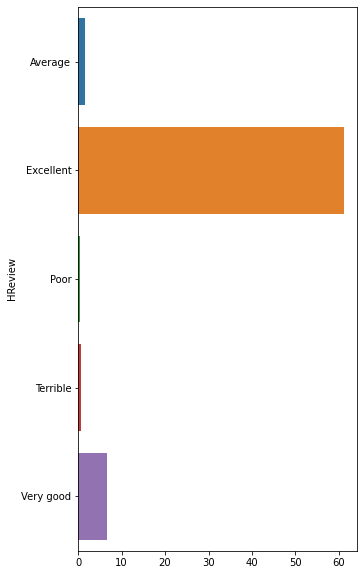

In [18]:
stat_table("HReview")

In [ ]:
#Chúng ta có thể thấy số lượng khách sạn được đánh giá Excellent và Very good rất cao và chiếm số phần trăm cao hơn nhiều lần so với các đánh giá còn lại.
# ==> Điều này cho thấy rằng chất lượng của các khách sạn ở Quảng Nam được du khách đánh giá rất cao.

In [5]:
rv = pd.read_csv('QuangNam.csv')
rv.head()

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
0,This hotel so near the Cua Dai Beach with the ...,LENAERTS RAYAN,3.0,Date of stay: December 2019,NaN,Jun-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,NaN,https://www.tripadvisor.com/Profile/lenaerts0512,Near the beach,https://www.tripadvisor.com/Hotel_Review-g2980...
1,Our party of 5 stayed at Little Beach for 4 we...,Jane J,4.0,Date of stay: February 2020,2.0,May-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,Coleshill,https://www.tripadvisor.com/Profile/21janej,Vietnam hospitality at its best,https://www.tripadvisor.com/Hotel_Review-g2980...
2,Beautiful fairly new hotel in Hoi An! Fabulous...,BobV_7,39.0,Date of stay: March 2020,76.0,Apr-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,"Lenexa, Kansas",https://www.tripadvisor.com/Profile/BobV_7,Wonderful hotel in Hoi An,https://www.tripadvisor.com/Hotel_Review-g2980...
3,We visited this great hotel after much trama w...,Elaine E,9.0,Date of stay: March 2020,4.0,Apr-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Sittingbourne, United Kingdom",https://www.tripadvisor.com/Profile/elainee936,Fabulous,https://www.tripadvisor.com/Hotel_Review-g2980...
4,Little Beach is a Fantastic hotel!\r\n\r\nIt h...,Christine P,9.0,Date of stay: March 2020,NaN,Mar-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Secret Harbour, Australia",https://www.tripadvisor.com/Profile/chrissypad...,The most amazing bed we’ve ever slept in,https://www.tripadvisor.com/Hotel_Review-g2980...


In [6]:
rv.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url'],
      dtype=object)

In [33]:
# Kiem tra cac gia tri null
rv.isnull().sum()

HComment               1103
HCommenter             1110
HContribute            1121
HDate                  1152
HThanks                8776
HTime                  1103
HTravelType            8021
HTravelerRating        1090
h_Hotel_name           1062
h_reviewer_address    13956
h_reviewer_id          1113
h_title_comment        1108
h_url                     0
Month of stay             0
dtype: int64

In [34]:
import re

def  clean_text(text):
    """
    Lam sach cac du lieu van ban
    * ky hieu
    * doi thanh lower case
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(T))  )
        
    return text

In [36]:
rv.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url',
       'Month of stay'], dtype=object)

In [38]:
rv['HComment']= clean_text(rv['HComment'])

In [39]:
rv[["HComment", 'HTravelerRating']].sample(10)

,HComment,HTravelerRating
45303,i booked into the fireworks homestay with 2 fr...,50.0
40088,we came to checkin a little bit later than exp...,50.0
26802,great hotel we had a interconnecting 2 bedroom...,50.0
33661,good hostel good bed ac hot water very nice ba...,50.0
23728,we spent 4 nights at this hotel and can say th...,50.0
6209,whilst backpacking trough vietnam me and my fr...,50.0
3986,overall happy with our garden room and the poo...,40.0
18927,kayle from reception very kind she introduced ...,50.0
38948,big clean room whit refrigerator tv king size ...,50.0
25287,the hotel is a perfect location for a visit to...,40.0


In [40]:
# Đếm số lượng Rating
rv.HTravelerRating.value_counts()

50.0    36685
40.0     6821
30.0     1724
20.0      657
10.0      648
Name: HTravelerRating, dtype: int64

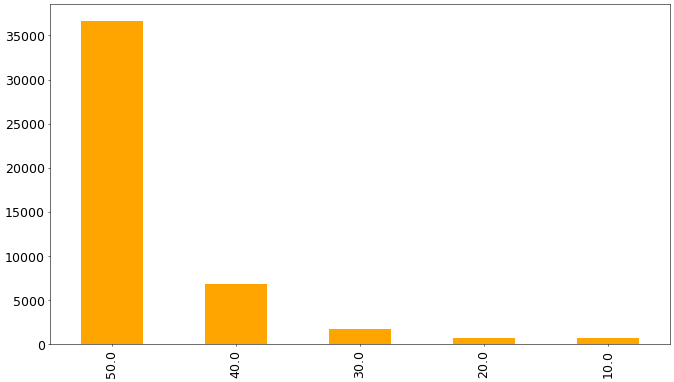

In [9]:
rv['HTravelerRating'].value_counts().plot.bar(color='orange')

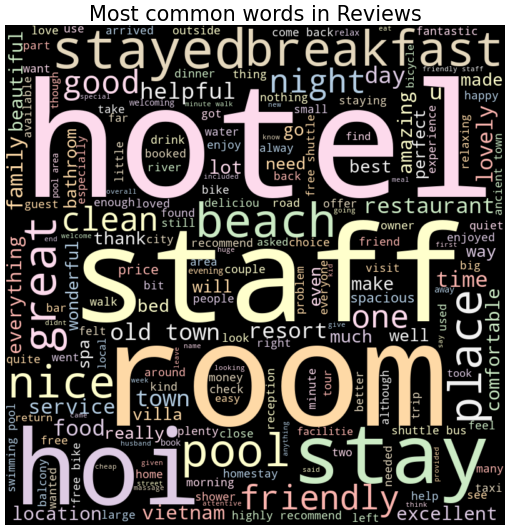

In [45]:
def wordCloud_generator(rv):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(rv.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(rv['HComment'])